# This Lab is open from 6 am to 3:30 pm on Friday, 9/20/2019
# Make sure to submit it by 3:30 on Friday 9/20/2019.

This Lab explores ways to calculate basic statistics, measure of spread and making a box plot for numeric variables in the data you used for HW3.  Please make sure to create a folder called Lab 3 in your DS 201 folder and save this ipynb file together with grbooks data. That way all of your solutions are separated from your other ipynb files and it  will be easier to find the solution when it is time to submit.


Please import appropriate libraries ( pandas, matplotlib, numpy etc.) and load the data in jupyter notebook. This data set has 22891 rows and 20 columns. Please do not show it all in the solution. It will take pages of this notebook to display the data. If you need to see how data looks like, just use code to see head or tail of the data.

 Most of the topics discussed this week apply to only numerical variables. So, please use only the following columns ( where author name and book name as categorical and other 4 columns arenumerical) from the data. 

In [14]:
cols=['author_name','book_title', 'book_average_rating', 'num_ratings', 'num_reviews',
        'score']

Let's start by importing all the necessory packages and the data

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as mpt
import seaborn as sbn
books = pd.read_csv('grbooks.csv')

### Problem 1 (10 points)
After you have a new data frame with only the columns mentioned above, find the standard deviation   and mean absolute deviation(MAD) of all 4 numerical variables. Find the variables with the lowest  and highest standard deviation. Do the same for MAD. Comment on what that means for these two variables to have lowest $\sigma$, highest $\sigma$, lowest MAD and highest MAD. 

(10 points)

In [16]:
df = books[cols]
df.columns

Index(['author_name', 'book_title', 'book_average_rating', 'num_ratings',
       'num_reviews', 'score'],
      dtype='object')

In [29]:
# yourdf.std(), and yourdf.mad() will give you standard deviations and MAD 
# for those 4 variables.

In [17]:
df.std()

book_average_rating         0.291317
num_ratings            180069.814253
num_reviews              6837.503574
score                   11022.018268
dtype: float64

the book average rating had the lowest std dev, while the number ratings had the highest. This means that the measurement scale for book average rating was probably significantly smaller than the range of the number of ratings.

In [18]:
df.mad()

book_average_rating        0.225215
num_ratings            66577.853866
num_reviews             3016.061533
score                   3721.948295
dtype: float64

Once again, the average book rating had the lowest MAD while the number of ratings has the highest.

### Problem 2 ( 10 points)
Find the first quartile  (Q1), second quartile (Q2 = Median) and the third quartile(Q3) of the 4 numerical columns. Which variables have the lowest and highest interquartile range (IQR). You can use Quantile function in pandas to find these. More about quantile function is here.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html

In [19]:
df.quantile([0.25, 0.5, 0.75])

,book_average_rating,num_ratings,num_reviews,score
0.25,3.77,820.0,106.0,832.0
0.50,3.96,4403.0,384.0,1727.0
0.75,4.14,20143.0,1504.0,3597.5


Quantile, Quartile and Percentile are related as below.

0 quartile = 0 quantile = 0 percentile

1 quartile = 0.25 quantile = 25 percentile

2 quartile = 0.5 quantile = 50 percentile (median)

3 quartile = 0.75 quantile = 75 percentile

4 quartile = 1 quantile = 100 percentile

Read more about these here.
https://stats.stackexchange.com/questions/156778/percentile-vs-quantile-vs-quartile

### Problem 3 ( 10 points)
Let's find the range of all 4 numerical columns. Range by definition  is  max - min for each variable. If you just use the code yourdf.max()-yourdf.min() then you will see an error. This is because yourdf.max will calculate 4 maximums for the 4 numerical columns and also lists author and book name with longest name. So when you subtract yourdf.min() from it, you are also subtracting a string from a string which is not defined. Addition of strings is defined though. See example below.

In [20]:
# Try yourdf.max() to see this.  Imagine trying to subtract from its output.

In [21]:
a = 'cy'
b = 'clone'

In [22]:
a+b

'cyclone'

In [23]:
a-b

TypeError: unsupported operand type(s) for -: 'str' and 'str'

There are multiple way to do this problem. You could do yourdf.describe(), find the min and max of all 4 variables and subract min from max for all 4. You could also do it individually
by doing yourdf.columnname.max()-yourdf.columnname.min() for each of the variables. One other option is to make a list of 4 numerical variables like below

In [28]:
numcols=['book_average_rating', 'num_ratings', 'num_reviews','score']
df[numcols].max() - df[numcols].min()

book_average_rating          5.0
num_ratings            3820921.0
num_reviews             147696.0
score                   598215.0
dtype: float64

By using range as a measure of spread, which variable data is ideal(symmetric) and which variable is most skewed?

By looking at the spead in the data from the range, it can be seen that some values are much bigger than the other. The range of average book rating is 5, hence this data is the most ideal. The num_ratings variable has the biggest range and hences the widest spread, therefore this variable is the most skewed. 

### Problem 4 ( 10 points)
We will find outliers in our data in this problem. For any variable, if any data falls below
the number $ Q1- 1.5 IQR$ or falls above the number $ Q3+ 1.5 IQR$ then those data points are outliers. Let's try this for for one variable named num_reviews.  Note:  In statistics, $IQR = Q3 - Q1$.

In [30]:
# Find Q1 and Q3 for num_review first.
Q1, Q3 = books.num_reviews.quantile([0.25, 0.75])

In [31]:
Q1

106.0

In [32]:
Q3

1504.0

I will then filter the data using these outlier conditions. Let's check the outliers below.

In [33]:
outliers1= books[books.num_reviews < Q1-1.5 * (Q3-Q1)]
outliers1.shape

(0, 20)

This means that there are no outliers as there is no row satisying the criteria. Data only shows 20 names of the columns.

In [34]:
outliers1

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score


Let's check on the other side.

In [35]:
outliers2= books[books.num_reviews > Q3+1.5 * (Q3-Q1)]
outliers2.shape

(3086, 20)

In [36]:
outliers2.head()
# Look at the num_reviews columns to see that this data frame has very
# large numbers in this column

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465,August 2005,3062
7,3.94,female,"nonfiction,",7956,Mary Roach\n,/author/show/7956.Mary_Roach,321197,29747,United States\n,3.84,https://www.goodreads.com/book/show/5981308-bonk,5981308,\n Bonk: The Curious Coupling of Science ...,Nonfiction,Science,45963,4268,319,2008,2054
10,4.39,male,"science-fiction-fantasy,",38550,Brandon Sanderson\n,/author/show/38550.Brandon_Sanderson,2613993,170695,United States\n,4.28,https://www.goodreads.com/book/show/15704459-f...,15704459,\n Firefight\n,Fantasy,Young Adult,65071,5161,416,2015,4347
13,4.26,female,"fiction,science-fiction-fantasy,",153394,Suzanne Collins\n,/author/show/153394.Suzanne_Collins,10212155,370569,United States\n,4.03,https://www.goodreads.com/book/show/7260188-mo...,7260188,\n Mockingjay\n,Young Adult,Science Fiction,2034222,98584,392,2010,12662
80,3.93,male,"science-fiction,children-s,fiction,",205,Robert A. Heinlein\n,/author/show/205.Robert_A_Heinlein,999390,31085,United States\n,3.91,https://www.goodreads.com/book/show/350.Strang...,350,\n Stranger in a Strange Land\n,Science Fiction,Fiction,249232,7108,528,July 1st 1961,9765


It looks like we have 3086 outliers in num_reviews variable. Many popular books are listed in this data sets which obviously have many more reviews compared to other books which are not that popular.

Check if book_average_rating column has any outliers below or above. List the total number of outliers, if any.

In [37]:
Q1, Q3 = books.book_average_rating.quantile([0.25, 0.75])

outliers1= books[books.book_average_rating < Q1-1.5 * (Q3-Q1)]
outliers1.shape

(258, 20)

In [39]:
outliers1.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
223,3.32,female,"historical-romance,",4606082,K.C. Hilton\n,/author/show/4606082.K_C_Hilton,2860,546,\n United States\n,3.13,https://www.goodreads.com/book/show/13641748-m...,13641748,\n My Name Is Rapunzel\n,Romance,Fantasy,1867,327,322,October 26th 2013,16647
427,3.83,male,"literature-fiction,",2546,Chuck Palahniuk\n,/author/show/2546.Chuck_Palahniuk,1325981,57285,United States\n,3.19,https://www.goodreads.com/book/show/1840511.Snuff,1840511,\n Snuff\n,Fiction,Contemporary,50514,2714,208,2008,3750
688,3.43,male,"literature-fiction,",5285,Aimee Bender\n,/author/show/5285.Aimee_Bender,84808,13315,\n United States\n,3.20,https://www.goodreads.com/book/show/7048800-th...,7048800,\n The Particular Sadness of Lemon Cake\n,Fiction,Magical Realism,52142,9511,292,2010,6555
1377,3.14,male,"memoir,crime,",1744933,O.J. Simpson\n,/author/show/1744933.O_J_Simpson,5870,869,United States\n,2.24,https://www.goodreads.com/book/show/96833.I_Wa...,96833,\n I Want to Tell You: My Response to You...,Nonfiction,Crime,206,28,208,1995,31146
1433,3.50,male,"science-fiction-fantasy,historical-fiction,",1448,Karen Joy Fowler\n,/author/show/1448.Karen_Joy_Fowler,174557,18388,United States\n,3.08,https://www.goodreads.com/book/show/2152.The_J...,2152,\n The Jane Austen Book Club\n,Fiction,Womens Fiction,60102,4135,288,January 1st 2004,13729


In [38]:
outliers2= books[books.book_average_rating > Q3+1.5 * (Q3-Q1)]
outliers2.shape

(165, 20)

In [40]:
outliers2.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
128,4.45,female,"fiction,",1077326,J.K. Rowling\n,/author/show/1077326.J_K_Rowling,21098703,516169,United Kingdom\n,4.74,https://www.goodreads.com/book/show/862041.Har...,862041,\n Harry Potter Series Box Set\n,Fantasy,Young Adult,224432,6881,4100,2007,15445
318,4.74,male,"science-fiction,young-adult,",8283255,J.S. Burke\n,/author/show/8283255.J_S_Burke,290,196,\n United States\n,4.82,https://www.goodreads.com/book/show/32598789-d...,32598789,\n Dragon Lightning\n,Fantasy,Fantasy,78,56,264,2016,2462
572,4.76,male,"fantasy,young-adult,",16789375,Malcolm McCoard\n,/author/show/16789375.Malcolm_McCoard,165,38,United Kingdom\n,4.79,https://www.goodreads.com/book/show/35002208-m...,35002208,\n Maya's Magical Adventures\n,Fantasy,Fiction,94,23,175,2017,2657
884,4.31,male,"literature-fiction,biographies-memoirs,",5600,Patrick O'Brian\n,/author/show/5600.Patrick_O_Brian,239403,10172,United Kingdom\n,4.70,https://www.goodreads.com/book/show/24520.The_...,24520,\n The Complete Aubrey/Maturin Novels (5 ...,Historical,Fiction,1268,79,6576,1994,21766
1067,4.69,male,"young-adult,paranormal-and-fantasy,",5805745,Craig MacLachlan\n,/author/show/5805745.Craig_MacLachlan,26,8,United States\n,4.81,https://www.goodreads.com/book/show/13576691-s...,13576691,\n Summer's Shadow\n,Young Adult,Fantasy,21,8,356,2014,690


total number of outliers are 258 + 165 = 423 outliers

### Problem 5 (10 points)

Let's make a box plot of our data. We will use only numerical columns. So, our data is:

In [69]:
numcols=['book_average_rating', 'num_ratings', 'num_reviews','score']
books1= books[numcols]

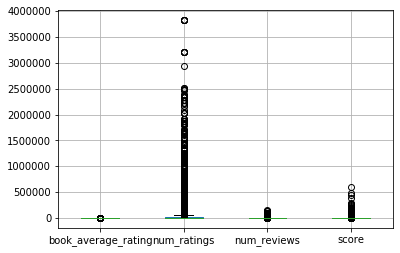

In [70]:
books1.boxplot()

Not good. This is happenning because there are too many outliers in some variables and trying to include those is making our box dissapear. Let's try

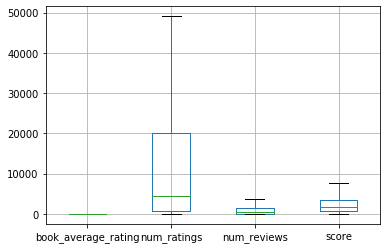

In [71]:
books1.boxplot(showfliers=False) # We are not showing fliers (outliers).

Better. But what's wrong with this?

Let's try one at a time.  Fill in the following blank to complete the code that shows one boxplot at a time.

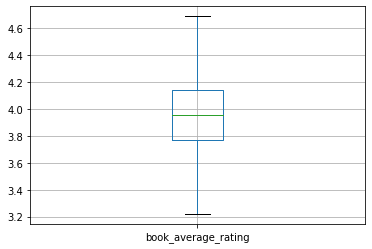

In [78]:
for i in ['book_average_rating']:
    mpt.figure()
    books1.boxplot(['book_average_rating'], showfliers=False)

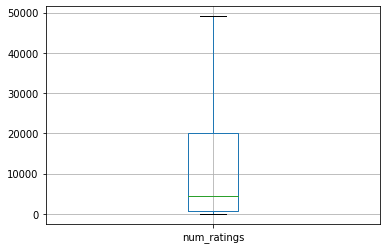

In [80]:
for i in ['num_ratings']:
    mpt.figure()
    books1.boxplot(['num_ratings'], showfliers=False)

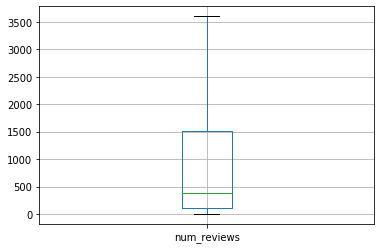

In [81]:
for i in ['num_reviews']:
    mpt.figure()
    books1.boxplot(['num_reviews'], showfliers=False)

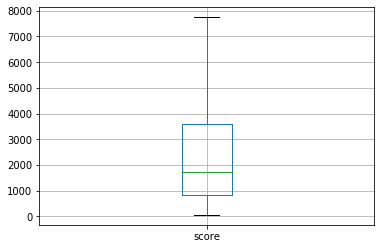

In [82]:
for i in ['score']:
    mpt.figure()
    books1.boxplot(['score'], showfliers=False)

Using seaborn

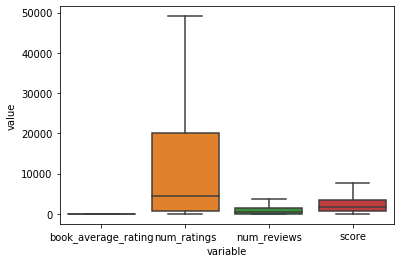

In [83]:
sbn.boxplot(x="variable", y="value",showfliers=False, data=pd.melt(books1))

Again, what doesn't look good about the above graph?  What can we do to fix this problem?

The value range for the different variables is too high hence putting all of them in the same graph will lead to some of the variables not being represented properly 

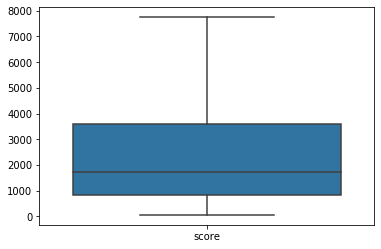

In [84]:
sbn.boxplot(data=books1[['score']],showfliers=False)

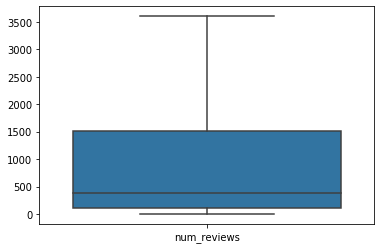

In [42]:
sbn.boxplot(data=books1[['num_reviews']],showfliers=False)

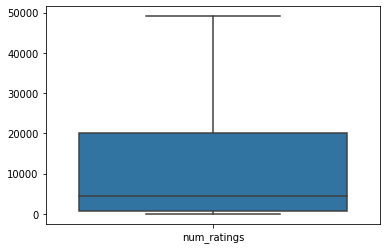

In [43]:
sbn.boxplot(data=books1[['num_ratings']],showfliers=False)

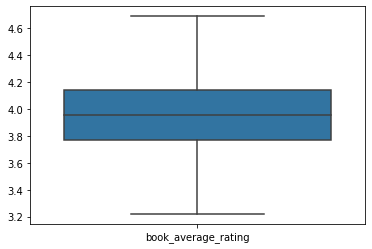

In [44]:
sbn.boxplot(data=books1[['book_average_rating']],showfliers=False)

What does the horizontal black line in the middle of all of these box plots represent?

second quartile